# Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.read_csv("marketing_campaign.csv", sep="\t")

df.drop(["Marital_Status", "Education", "Dt_Customer"], axis=1, inplace=True)
df = df[np.isfinite(df).all(1)]

print(df.head(3))


     ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   

   MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
0              546              172  ...                  7             0   
1                6                2  ...                  5             0   
2              127              111  ...                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1

# Метод k средних

In [2]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

# iris = datasets.load_iris() 
# features = iris.data

# Стандартизировать признаки
scaler = StandardScaler()
features_std = scaler.fit_transform(np.array(df.values))

# Создать объект k средних
# cluster = KMeans(n_clusters=5, random_state=0, n_init="auto")
cluster = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100, n_init="auto")

# Натренировать модель
model = cluster.fit(features_std)
labels = model.labels_


**Выводи результата**

[2 0 2 ... 2 2 0]
0.22709455175594823
0: 1262
1: 183
2: 771


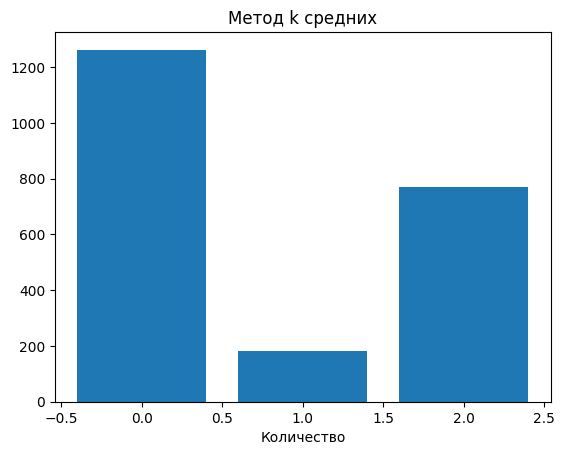

In [3]:
print(labels)
print(silhouette_score(features_std, labels))
counts = np.bincount(labels)
print("\n".join(f"{index}: {value}" for index, value in enumerate(counts)))

plt.bar([index for index in range(len(counts))], counts)
plt.xlabel("Кластеры")
plt.xlabel("Количество")
plt.title("Метод k средних")
plt.show()

# Метод сдвига к среднему

In [4]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import MeanShift

# Стандартизировать признаки
scaler = StandardScaler()
features_std = scaler.fit_transform(np.array(df.values))

# Создать объект кластеризации методом сдвига к среднему 
cluster = MeanShift(n_jobs=-1)

# Натренировать модель
model = cluster.fit(features_std)
labels = model.labels_

**Выводи результата**

[0 0 0 ... 0 0 0]
0.2130089143181098
0: 1984
1: 22
2: 19
3: 3
4: 3
5: 2
6: 2
7: 2
8: 1
9: 1
10: 1
11: 1
12: 1
13: 18
14: 65
15: 1
16: 1
17: 1
18: 2
19: 17
20: 1
21: 17
22: 51


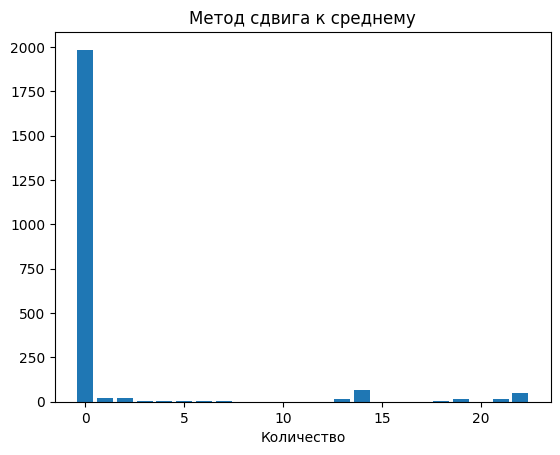

In [5]:
print(labels)
print(silhouette_score(features_std, labels))
counts = np.bincount(labels)
print("\n".join(f"{index}: {value}" for index, value in enumerate(counts)))

plt.bar([index for index in range(len(counts))], counts)
plt.xlabel("Кластеры")
plt.xlabel("Количество")
plt.title("Метод сдвига к среднему")
plt.show()

# Метод DBSCAN

In [16]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import DBSCAN


# Стандартизировать признаки 
scaler = StandardScaler()
features_std = scaler.fit_transform(np.array(df.values))

# Создать объект плотностной кластеризации dbscan 
cluster = DBSCAN(min_samples=3)

# Натренировать модель
model = cluster.fit(features_std)
labels = model.labels_


**Выводи результата**

[-1 -1 -1 ... -1 -1 -1]
-0.12868764144200978
-1: 2213
0: 3


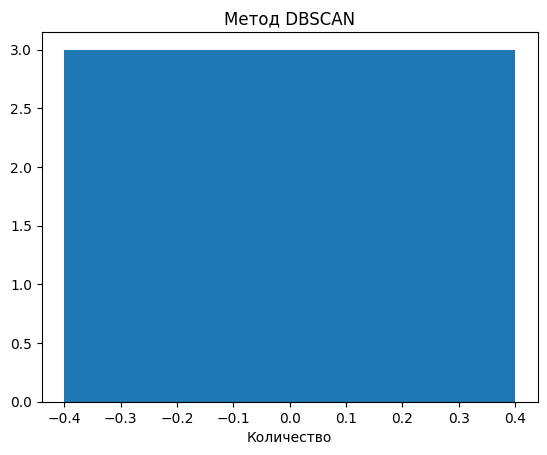

In [17]:
print(labels)
print(silhouette_score(features_std, labels))
# labels = labels[labels != -1]
unique_labels, label_counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"{label}: {count}")
# counts = np.bincount(labels)
# print("\n".join(f"{index}: {value}" for index, value in enumerate(counts)))

# plt.bar([index for index in range(len(counts))], counts)
plt.bar(unique_labels, label_counts)
plt.xlabel("Кластеры")
plt.xlabel("Количество")
plt.title("Метод DBSCAN")
plt.show()

# Метод иерархического слияния

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import AgglomerativeClustering


# Стандартизировать признаки 
scaler = StandardScaler()
features_std = scaler.fit_transform(np.array(df.values))

# Создать объект агломеративной кластеризации 
cluster = AgglomerativeClustering(n_clusters=3)

# Натренировать модель
model = cluster.fit(features_std)
labels = model.labels_

**Выводи результата**

[2 0 2 ... 2 2 0]
0.19473470003716356
0: 1257
1: 250
2: 709


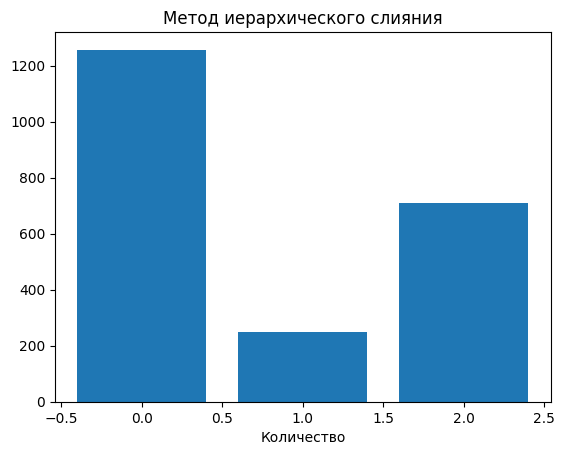

In [ ]:
print(labels)
print(silhouette_score(features_std, labels))
counts = np.bincount(labels)
print("\n".join(f"{index}: {value}" for index, value in enumerate(counts)))

plt.bar([index for index in range(len(counts))], counts)
plt.xlabel("Кластеры")
plt.xlabel("Количество")
plt.title("Метод иерархического слияния")
plt.show()